## Project:Diabetes Diagnosis

## Dataset Overview

This dataset comprises the health and demographic data of 100,000 individuals, aimed at facilitating diabetes-related research and predictive modeling. Each row represents a single individual, and the dataset includes 16 columns with detailed health and demographic information. Below is a breakdown of the dataset'columns:

### **The data**
| Column                   | Description                                                                            |
|--------------------------|----------------------------------------------------------------------------------------|
| `year`                   | The year the data was collected (int)                                                  |
| `Gender`                 | The gender of the individual (Male/Female/Other)                                       |
| `Age`                    | The age of the individual (in years)                                                   |
| `Location`               | Geographic location or region where the individual resides                             |
| `race:AfricanAmerican`    | Binary indicator (0 or 1) for African American race                                    |
| `race:Asian`             | Binary indicator (0 or 1) for Asian race                                               |
| `race:Caucasian`         | Binary indicator (0 or 1) for Caucasian race                                           |
| `race:Hispanic`          | Binary indicator (0 or 1) for Hispanic race                                            |
| `race:Other`             | Binary indicator (0 or 1) for other races                                              |
| `Hypertension`           | Whether the individual has been diagnosed with hypertension (0 = No, 1 = Yes)          |
| `Heart Disease`          | Whether the individual has been diagnosed with heart disease (0 = No, 1 = Yes)         |
| `Smoking History`        | The individual's smoking history (Never, Former, Current)                              |
| `BMI`                    | Body Mass Index, a measure of body fat based on height and weight (kg/m²)              |
| `HbA1c Level`            | Hemoglobin A1c level, a measure of blood sugar control over the past 2-3 months (%)    |
| `Blood Glucose Level`    | Fasting blood glucose level (mg/dL)                                                    |
| `Diabetes`               | Whether the individual has been diagnosed with diabetes (0 = No, 1 = Yes)              |

This dataset is intended for use in diabetes-related research, enabling insights into potential risk factors, the prevalence of diabetes, and supportingf diabetes, and supporting predictive modeling.


## **Importing the Libraries and loading the Data and preprocessing the data**

In [147]:
pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [211]:
data = pd.read_csv('diabetes_dataset.csv')

In [212]:
data.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


In [213]:
d=data.copy()
d.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [214]:
d.shape

(100000, 16)

In [215]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [216]:
#Total number of records
n_records = d.shape[0]
#Number of records where individual are diabitic
diabitic = d['diabetes'].value_counts()[1]


#Number of records where individual are not diabitic
non_diabitic =d['diabetes'].value_counts()[0]


#Percentage of individuals who are diabitic
diabitic_percent = round((diabitic / n_records) * 100)

#Percentage of individuals who are not diabitic
non_diabitic_percent = round((non_diabitic / n_records) * 100)

#Print the results

print("Total number of records: {}".format(n_records))
print("Individuals which are diabitic: {}".format(diabitic))

print("Individuals which are not diabitic: {}".format(non_diabitic))
print("Percentage of individuals who are diabitic: {}%".format(diabitic_percent))
print("Percentage of individuals who are not diabitic: {}%".format(non_diabitic_percent))

Total number of records: 100000
Individuals which are diabitic: 8500
Individuals which are not diabitic: 91500
Percentage of individuals who are diabitic: 8%
Percentage of individuals who are not diabitic: 92%


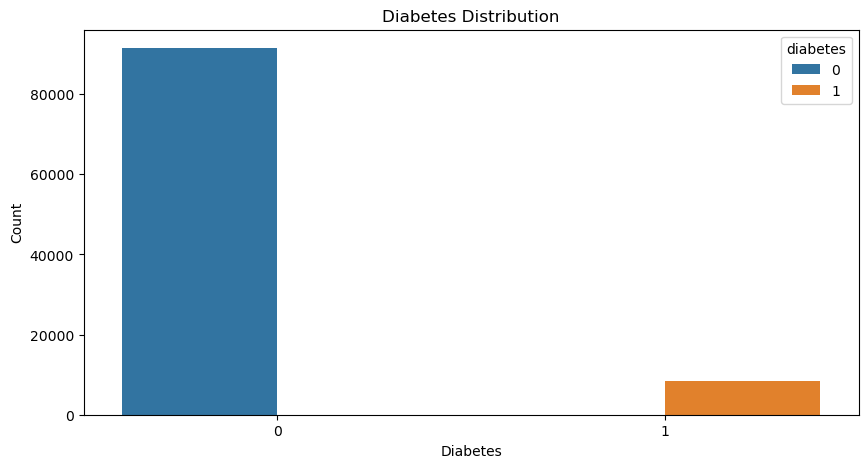

In [217]:
#Checking for Diabetes Distribution
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=d, x='diabetes',hue='diabetes')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

* There is a problem in this dataset as there is an imbalance betewwen the two classes we want to predict as 92% of the people in the dataset are non-diabetic and only 8% of the people are diabetic which will represent a problem for the machine learning model to classify and detect this class. 

In [218]:
d['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

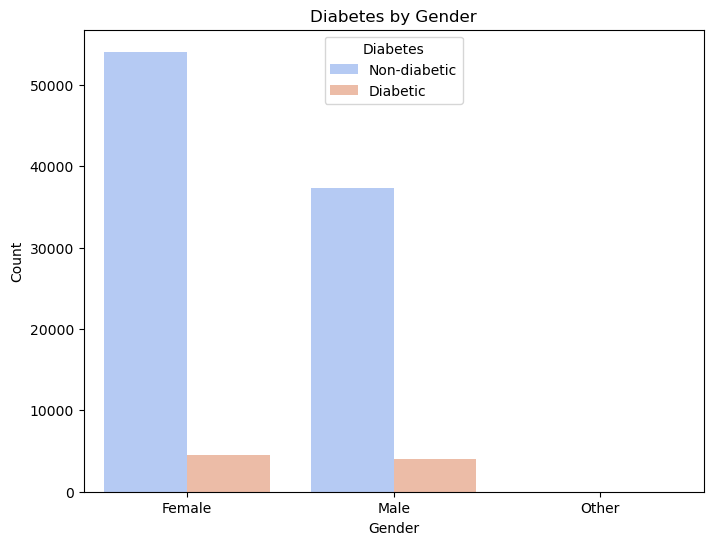

In [219]:
#Diabetes by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=d,x='gender',hue='diabetes',palette='coolwarm')
plt.title('Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes',labels=['Non-diabetic','Diabetic'])
plt.show()

## **Balancing and cleaning the dataset**

In [220]:
other_d =d[d['gender']=='Other']
other_d

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
1611,2019,Other,23.0,Alabama,0,1,0,0,0,0,0,No Info,24.23,6.1,140,0
2550,2019,Other,19.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,5.7,158,0
2787,2019,Other,39.0,Alaska,0,1,0,0,0,0,0,not current,31.24,6.2,85,0
4385,2015,Other,10.0,Arizona,1,0,0,0,0,0,0,not current,14.09,5.0,140,0
5064,2019,Other,10.0,Arizona,0,0,1,0,0,0,0,not current,16.59,6.1,160,0
7975,2019,Other,45.0,Arkansas,0,0,0,1,0,0,0,never,27.32,4.0,159,0
19647,2019,Other,47.0,Florida,0,0,1,0,0,0,0,never,36.76,6.6,90,0
19658,2019,Other,47.0,Florida,1,0,0,0,0,0,0,never,36.76,3.5,200,0
22784,2019,Other,53.0,Guam,0,0,1,0,0,0,0,No Info,27.32,6.6,160,0
32002,2019,Other,18.0,Iowa,0,0,1,0,0,0,0,not current,30.19,6.1,90,0


In [221]:
other_d.index

Index([ 1611,  2550,  2787,  4385,  5064,  7975, 19647, 19658, 22784, 32002,
       52722, 58482, 59534, 64571, 69173, 69763, 70701, 70863],
      dtype='int64')

In [222]:
d.drop(labels=[1611,2550,2787,4385,5064,7975,19647,19658,22784,32002,52722,58482,59534,64571,69173,69763,70701,70863],axis=0,inplace=True)

* Removing the other data in the gender column as none of them are diabetic despite some of them having high blood glucose level and hbA1c level than normal which leads to being diabetic but in the dataset they are not diabetic and Given that the "Other" category has only 18 rows and none of them are diabetic, it may be reasonable to remove this category from the analysis. This would simplify the dataset and focus on the more significant findings related to males and females, which have a larger sample size and relevant diabetic data.

In [223]:
#checking for duplicate data
duplicate_rows_data = d[d.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (14, 16)


In [224]:
d.drop_duplicates(inplace=True)
d.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [225]:
#Checking for amount of null values
d.isna().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [226]:
d = d[d["smoking_history"] != "No Info"]

In [227]:
d.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [228]:
diabetes_yes = d[d["diabetes"] == 1]
diabetes_no = d[d["diabetes"] == 0].sample(n = diabetes_yes.shape[0], ignore_index = True, random_state = 42)

sample = pd.concat([diabetes_yes, diabetes_no], axis = 0).reset_index(drop = True)

sample.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2016,Female,64.0,Alabama,0,0,0,0,1,0,0,ever,49.27,8.2,140,1
1,2016,Male,80.0,Alabama,1,0,0,0,0,0,0,former,29.16,8.8,140,1
2,2016,Female,42.0,Alabama,0,0,0,0,1,0,0,current,27.32,7.5,130,1
3,2016,Female,80.0,Alabama,0,0,0,1,0,0,1,never,26.00,7.5,200,1
4,2015,Female,79.0,Alabama,0,0,1,0,0,0,0,never,30.84,5.8,220,1


In [237]:
d=sample.copy()

In [238]:
df_race = d[["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]]
by_race = pd.from_dummies(df_race)
d = d.drop(columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"])
d.insert(2, "race", by_race)
d["race"] = d["race"].str.replace("race:", "")
d.head()

,year,gender,race,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2016,Female,Other,64.0,Alabama,0,0,ever,49.27,8.2,140,1
1,2016,Male,AfricanAmerican,80.0,Alabama,0,0,former,29.16,8.8,140,1
2,2016,Female,Other,42.0,Alabama,0,0,current,27.32,7.5,130,1
3,2016,Female,Hispanic,80.0,Alabama,0,1,never,26.00,7.5,200,1
4,2015,Female,Caucasian,79.0,Alabama,0,0,never,30.84,5.8,220,1


In [231]:
race_diabetes = d.groupby(['race', 'diabetes']).size().unstack(fill_value=0)

print("\nRace Distribution by Diabetes Status:")
print(race_diabetes)


Race Distribution by Diabetes Status:
diabetes            0     1
race                       
AfricanAmerican  1468  1488
Asian            1429  1414
Caucasian        1409  1388
Hispanic         1344  1398
Other            1396  1358


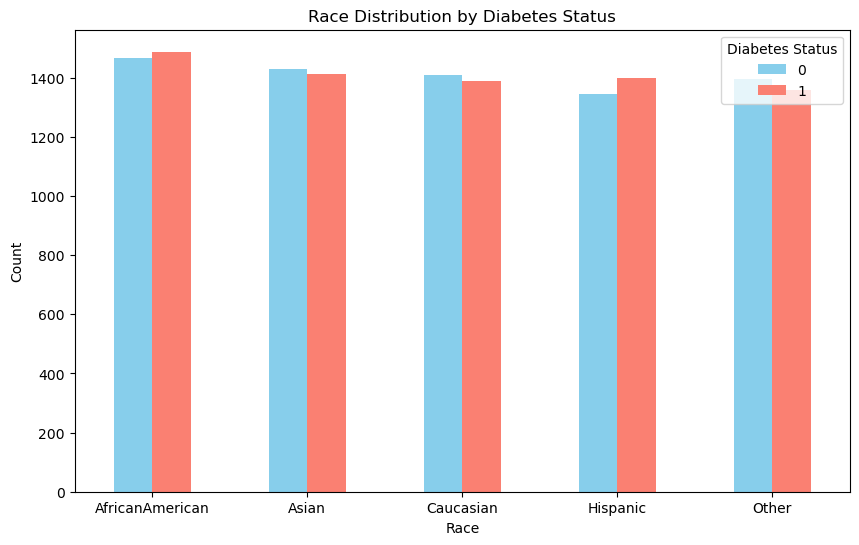

In [232]:
#Race and Diabetes Distribution
# Create a stacked bar chart
race_diabetes.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Race Distribution by Diabetes Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()

* The counts for each racial group (African-American, Asian, Caucasian, Hispanic, and Other) are relatively similar, indicating a balanced representation across these categories.The data suggests that across all racial categories, there are more individuals without diabetes compared to those with diabetes. However, the differences are not drastic, indicating that diabetes prevalence may be relatively consistent across these racial groups.

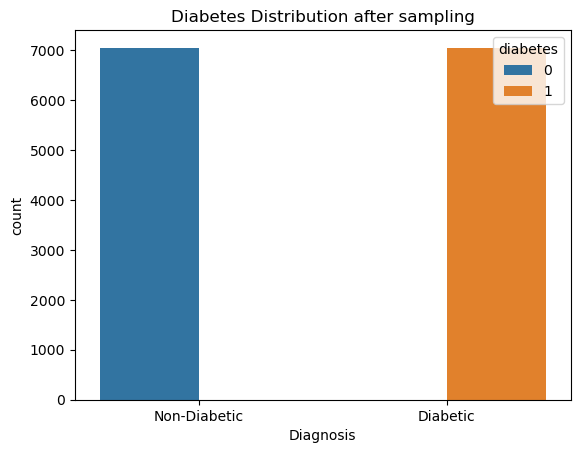

In [233]:
# Diabetes Distribution after sampling
d = sns.countplot(data = sample, x = "diabetes",hue='diabetes')
d.set_title("Diabetes Distribution after sampling")
d.set_xlabel("Diagnosis")
d.set_xticklabels(["Non-Diabetic", "Diabetic"])
plt.show()

In [239]:
d.head()

,year,gender,race,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2016,Female,Other,64.0,Alabama,0,0,ever,49.27,8.2,140,1
1,2016,Male,AfricanAmerican,80.0,Alabama,0,0,former,29.16,8.8,140,1
2,2016,Female,Other,42.0,Alabama,0,0,current,27.32,7.5,130,1
3,2016,Female,Hispanic,80.0,Alabama,0,1,never,26.00,7.5,200,1
4,2015,Female,Caucasian,79.0,Alabama,0,0,never,30.84,5.8,220,1


In [240]:
d.shape

(14092, 12)

In [243]:
d.groupby(['diabetes']).aggregate({'diabetes': 'count'})

,diabetes
diabetes,
0,7046
1,7046


* Creating balanced samples from the dataset to solve the imbalance problem in the dataset 

In [246]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
year,14092.0,2018.342180,1.362640,2015.00,2019.00,2019.000,2019.0,2022.00
age,14092.0,52.770551,18.720358,0.24,39.00,55.000,67.0,80.00
hypertension,14092.0,0.167826,0.373725,0.00,0.00,0.000,0.0,1.00
heart_disease,14092.0,0.090548,0.286975,0.00,0.00,0.000,0.0,1.00
bmi,14092.0,30.093620,7.278783,10.19,26.01,27.855,33.6,88.76
hbA1c_level,14092.0,6.158963,1.284128,3.50,5.70,6.100,6.6,9.00
blood_glucose_level,14092.0,163.252768,56.601380,80.00,130.00,155.000,200.0,300.00
diabetes,14092.0,0.500000,0.500018,0.00,0.00,0.500,1.0,1.00


## **Data visualization for the dataset**

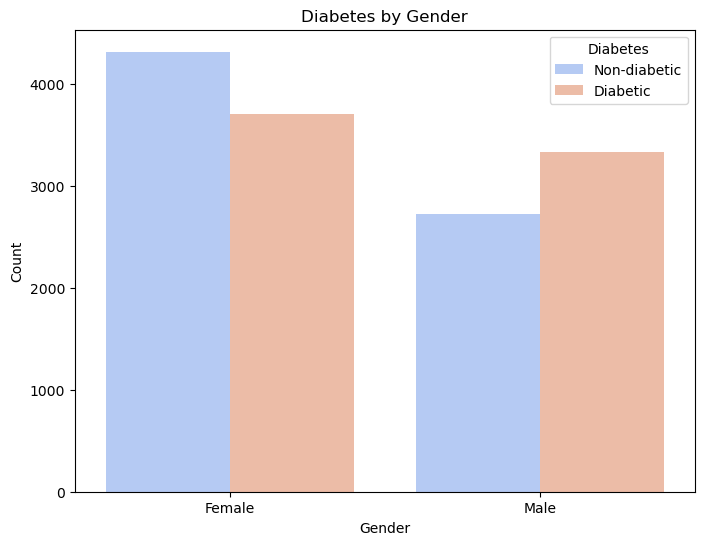

In [179]:
#Diabetes by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=d,x='gender',hue='diabetes',palette='coolwarm')
plt.title('Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes',labels=['Non-diabetic','Diabetic'])
plt.show()

In [180]:
d['gender'].value_counts()

gender
Female    8026
Male      6066
Name: count, dtype: int64

In [181]:
d.groupby(['gender', 'diabetes']).aggregate({'gender': 'count'})

gender
gender diabetes        
Female 0           4319
       1           3707
Male   0           2727
       1           3339

* In the **Gender** column There are more females than males in the dataset and the most of them are non-diabetic but there are also abig amount of them are diabetic but in the males it is the opposite as more men are diabetic than non-diabetic

In [182]:
#Checking for skewness in the data
d.skew(numeric_only=True)

year                   -1.706704
age                    -0.415654
race:AfricanAmerican    1.425879
race:Asian              1.486587
race:Caucasian          1.512076
race:Hispanic           1.543181
race:Other              1.536334
hypertension            1.777894
heart_disease           2.853977
bmi                     1.248461
hbA1c_level             0.227882
blood_glucose_level     0.852319
diabetes                0.000000
dtype: float64

In [183]:
d.corr(numeric_only=True)['diabetes']

year                   -0.003646
age                     0.442822
race:AfricanAmerican    0.003486
race:Asian             -0.002652
race:Caucasian         -0.003736
race:Hispanic           0.009680
race:Other             -0.006800
hypertension            0.248180
heart_disease           0.204752
bmi                     0.291726
hbA1c_level             0.603080
blood_glucose_level     0.536568
diabetes                1.000000
Name: diabetes, dtype: float64

In [184]:
#Checking for correlation of columns with Diabetes column
d.corr(numeric_only=True)['diabetes']

year                   -0.003646
age                     0.442822
race:AfricanAmerican    0.003486
race:Asian             -0.002652
race:Caucasian         -0.003736
race:Hispanic           0.009680
race:Other             -0.006800
hypertension            0.248180
heart_disease           0.204752
bmi                     0.291726
hbA1c_level             0.603080
blood_glucose_level     0.536568
diabetes                1.000000
Name: diabetes, dtype: float64

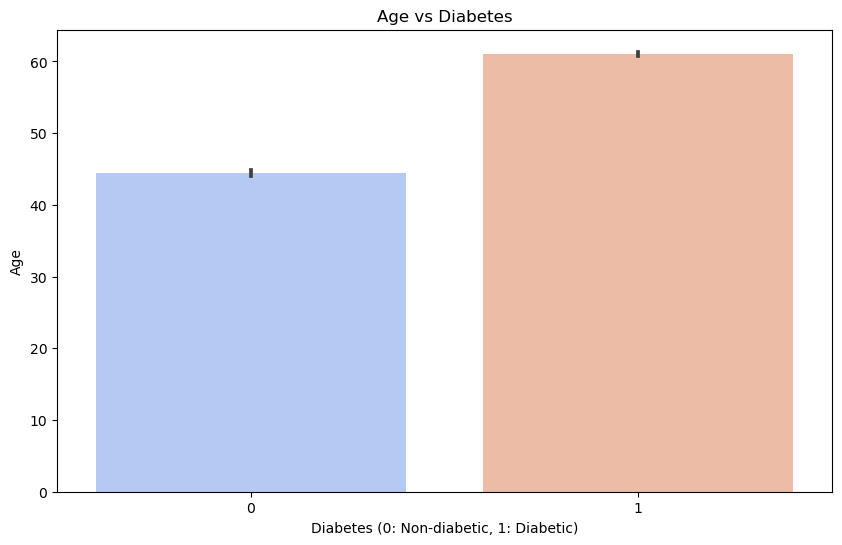

In [185]:
#Plotting age vs diabetes
plt.figure(figsize=(10, 6))
sns.barplot(x='diabetes', y='age', data=d, palette='coolwarm')
plt.title('Age vs Diabetes')
plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Age')
plt.show()

* The average age of non-diabetic individuals (represented by the blue bar) is around 45 years.
The average age of diabetic individuals (represented by the orange bar) is significantly higher, around 60 years
There is a clear trend indicating that diabetes is more prevalent in older individuals, as evidenced by the higher average age in the diabetic group.

# **Preparing the Data for Machine Learning and Building multiple models**

In [247]:
d.head(10)

,year,gender,race,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2016,Female,Other,64.0,Alabama,0,0,ever,49.27,8.2,140,1
1,2016,Male,AfricanAmerican,80.0,Alabama,0,0,former,29.16,8.8,140,1
2,2016,Female,Other,42.0,Alabama,0,0,current,27.32,7.5,130,1
3,2016,Female,Hispanic,80.0,Alabama,0,1,never,26.00,7.5,200,1
4,2015,Female,Caucasian,79.0,Alabama,0,0,never,30.84,5.8,220,1
5,2016,Female,AfricanAmerican,49.0,Alabama,0,0,ever,27.32,6.1,160,1
6,2016,Female,Other,54.0,Alabama,0,0,former,44.10,7.0,159,1
7,2016,Male,Hispanic,53.0,Alabama,0,0,never,27.01,6.2,280,1
8,2016,Female,AfricanAmerican,39.0,Alabama,0,0,never,32.81,6.1,155,1
9,2015,Male,Other,68.0,Alabama,0,0,former,34.28,7.0,280,1


In [248]:
d.drop(columns = ['year', 'location','race'], axis = 1,inplace=True)

In [249]:
d.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,64.0,0,0,ever,49.27,8.2,140,1
1,Male,80.0,0,0,former,29.16,8.8,140,1
2,Female,42.0,0,0,current,27.32,7.5,130,1
3,Female,80.0,0,1,never,26.00,7.5,200,1
4,Female,79.0,0,0,never,30.84,5.8,220,1


In [250]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d['gender']=l.fit_transform(d['gender'])
d['smoking_history']=l.fit_transform(d['smoking_history'])

In [251]:
d.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0,64.0,0,0,1,49.27,8.2,140,1
1,1,80.0,0,0,2,29.16,8.8,140,1
2,0,42.0,0,0,0,27.32,7.5,130,1
3,0,80.0,0,1,3,26.00,7.5,200,1
4,0,79.0,0,0,3,30.84,5.8,220,1


## Splitting and Training the data 

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = d.loc[:, d.columns != 'diabetes']
y = d['diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11273, 8), (2819, 8), (11273,), (2819,))

# Function for evaluating model's performance on test dataset with Multiple Evaluation metrics for ML Models

In [73]:
from sklearn import metrics
from sklearn.metrics import average_precision_score

def evaluation(y_test, y_pred, y_pred_proba=None):
    print(f"Model Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    if y_pred_proba is not None:
        auc_pr = average_precision_score(y_test, y_pred_proba)
        print(f"AUC-PR Score: {auc_pr * 100:.2f}%")
    print(f"Classification Report:\n {metrics.classification_report(y_test, y_pred)}")

    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt=".2f",xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label", fontsize=15)
    plt.ylabel("Actual Label", fontsize=15)
    plt.show()


## 1. Decision Tree

Model Accuracy: 85.46%
AUC-PR Score: 80.11%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1410
           1       0.85      0.86      0.86      1409

    accuracy                           0.85      2819
   macro avg       0.85      0.85      0.85      2819
weighted avg       0.85      0.85      0.85      2819



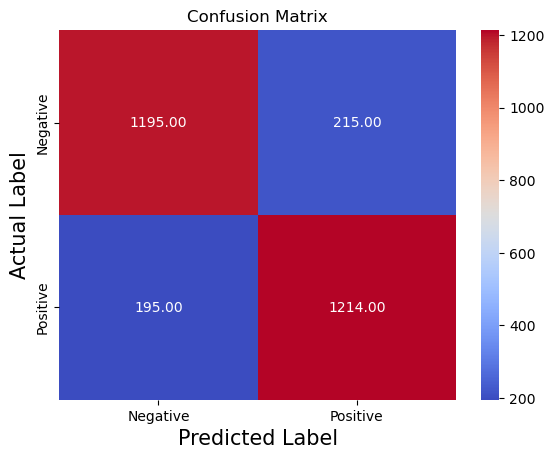

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)[:, 1]
evaluation(y_test, dt_pred, dt_pred_proba)


## 2. Logistic Regression

Model Accuracy: 86.98%
AUC-PR Score: 95.79%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1410
           1       0.87      0.87      0.87      1409

    accuracy                           0.87      2819
   macro avg       0.87      0.87      0.87      2819
weighted avg       0.87      0.87      0.87      2819



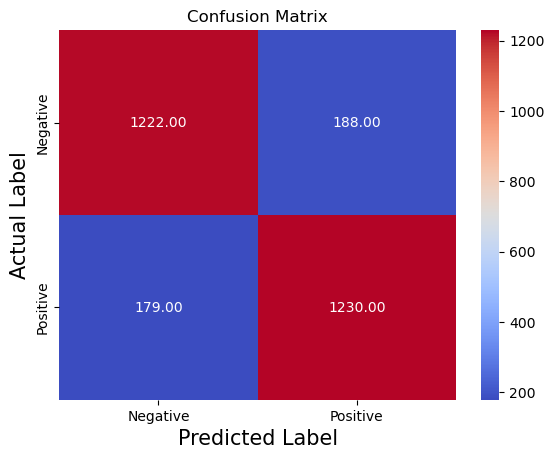

In [75]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)

logr_pred = logr.predict(X_test)

logr_pred_proba = logr.predict_proba(X_test)[:, 1]
evaluation(y_test, logr_pred, logr_pred_proba)


## 3. Random forest

Model Accuracy: 88.75%
AUC-PR Score: 96.85%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1410
           1       0.89      0.89      0.89      1409

    accuracy                           0.89      2819
   macro avg       0.89      0.89      0.89      2819
weighted avg       0.89      0.89      0.89      2819



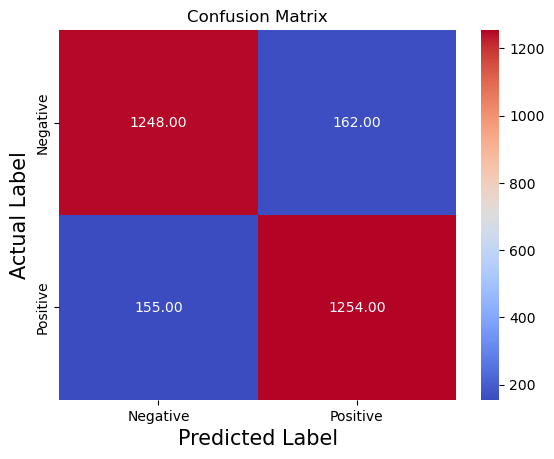

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_pred_proba = rf.predict_proba(X_test)[:, 1]

evaluation(y_test, rf_pred, rf_pred_proba)


## 4. XG Boost

Model Accuracy: 88.75%
AUC-PR Score: 97.06%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1410
           1       0.88      0.90      0.89      1409

    accuracy                           0.89      2819
   macro avg       0.89      0.89      0.89      2819
weighted avg       0.89      0.89      0.89      2819



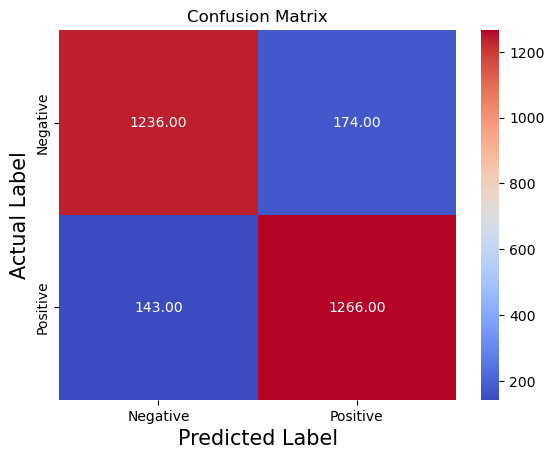

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)[:, 1]
evaluation(y_test, xgb_pred,xgb_pred_proba)

## 5. K-Nearest Neigbours

Model Accuracy: 82.62%
AUC-PR Score: 89.46%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1410
           1       0.85      0.80      0.82      1409

    accuracy                           0.83      2819
   macro avg       0.83      0.83      0.83      2819
weighted avg       0.83      0.83      0.83      2819



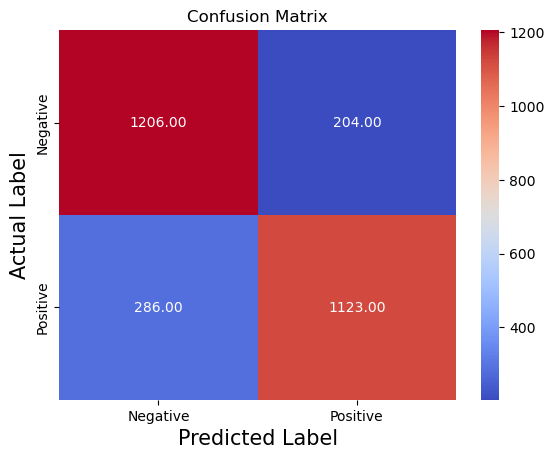

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)[:, 1]
evaluation(y_test, knn_pred,knn_pred_proba)


## 6. Naive Bayes

Model Accuracy: 84.25%
AUC-PR Score: 91.45%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1410
           1       0.88      0.79      0.83      1409

    accuracy                           0.84      2819
   macro avg       0.85      0.84      0.84      2819
weighted avg       0.85      0.84      0.84      2819



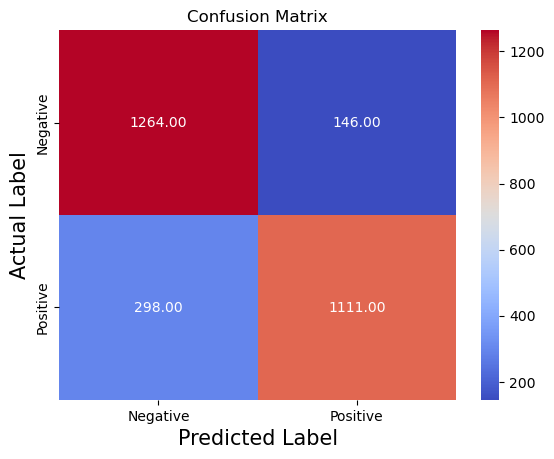

In [79]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)[:, 1]

evaluation(y_test, nb_pred,nb_pred_proba)


## 7. Gradient Boost

Model Accuracy: 89.89%
AUC-PR Score: 97.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1410
           1       0.89      0.92      0.90      1409

    accuracy                           0.90      2819
   macro avg       0.90      0.90      0.90      2819
weighted avg       0.90      0.90      0.90      2819



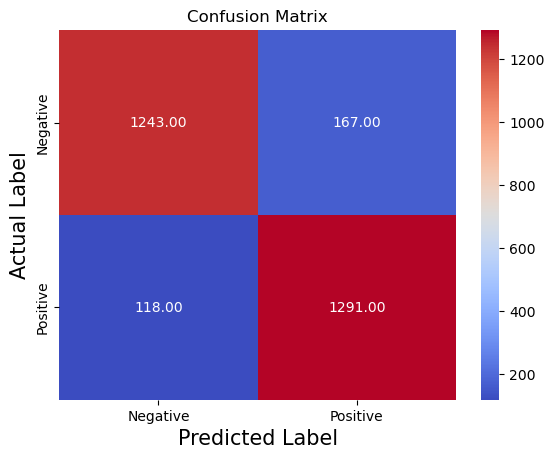

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_pred_proba = gb.predict_proba(X_test)[:, 1]
evaluation(y_test, gb_pred,gb_pred_proba)

# Comparing accuracy metrics

In [81]:
models = {
    'Decision Tree': dt,
    'Naive Bayes': nb,
    'Random Forest': rf,  
    'KNN': knn,
    'Logistic Regression': logr,
    'Gradient boost':gb,
    'XGBoost': xgb
}

In [82]:
from sklearn.metrics import average_precision_score, accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Predict class labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    auc_pr = average_precision_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results in a formatted way
    print(f"{model_name}:")
    print(f"  AUC-PR Score: {auc_pr * 100:.2f}%")
    print(f"  Accuracy: {accuracy * 100:.2f}%")
    print(f"  Precision: {precision * 100:.2f}%")
    print(f"  Recall: {recall * 100:.2f}%")
    print(f"  F1 Score: {f1 * 100:.2f}%")
    print("-" * 40)

Decision Tree:
  AUC-PR Score: 80.37%
  Accuracy: 85.67%
  Precision: 85.16%
  Recall: 86.37%
  F1 Score: 85.76%
----------------------------------------
Naive Bayes:
  AUC-PR Score: 91.45%
  Accuracy: 84.25%
  Precision: 88.39%
  Recall: 78.85%
  F1 Score: 83.35%
----------------------------------------
Random Forest:
  AUC-PR Score: 96.79%
  Accuracy: 88.44%
  Precision: 87.89%
  Recall: 89.14%
  F1 Score: 88.51%
----------------------------------------
KNN:
  AUC-PR Score: 89.46%
  Accuracy: 82.62%
  Precision: 84.63%
  Recall: 79.70%
  F1 Score: 82.09%
----------------------------------------
Logistic Regression:
  AUC-PR Score: 95.79%
  Accuracy: 86.98%
  Precision: 86.74%
  Recall: 87.30%
  F1 Score: 87.02%
----------------------------------------
Gradient boost:
  AUC-PR Score: 97.47%
  Accuracy: 89.89%
  Precision: 88.55%
  Recall: 91.63%
  F1 Score: 90.06%
----------------------------------------
XGBoost:
  AUC-PR Score: 97.06%
  Accuracy: 88.75%
  Precision: 87.92%
  Recall: 

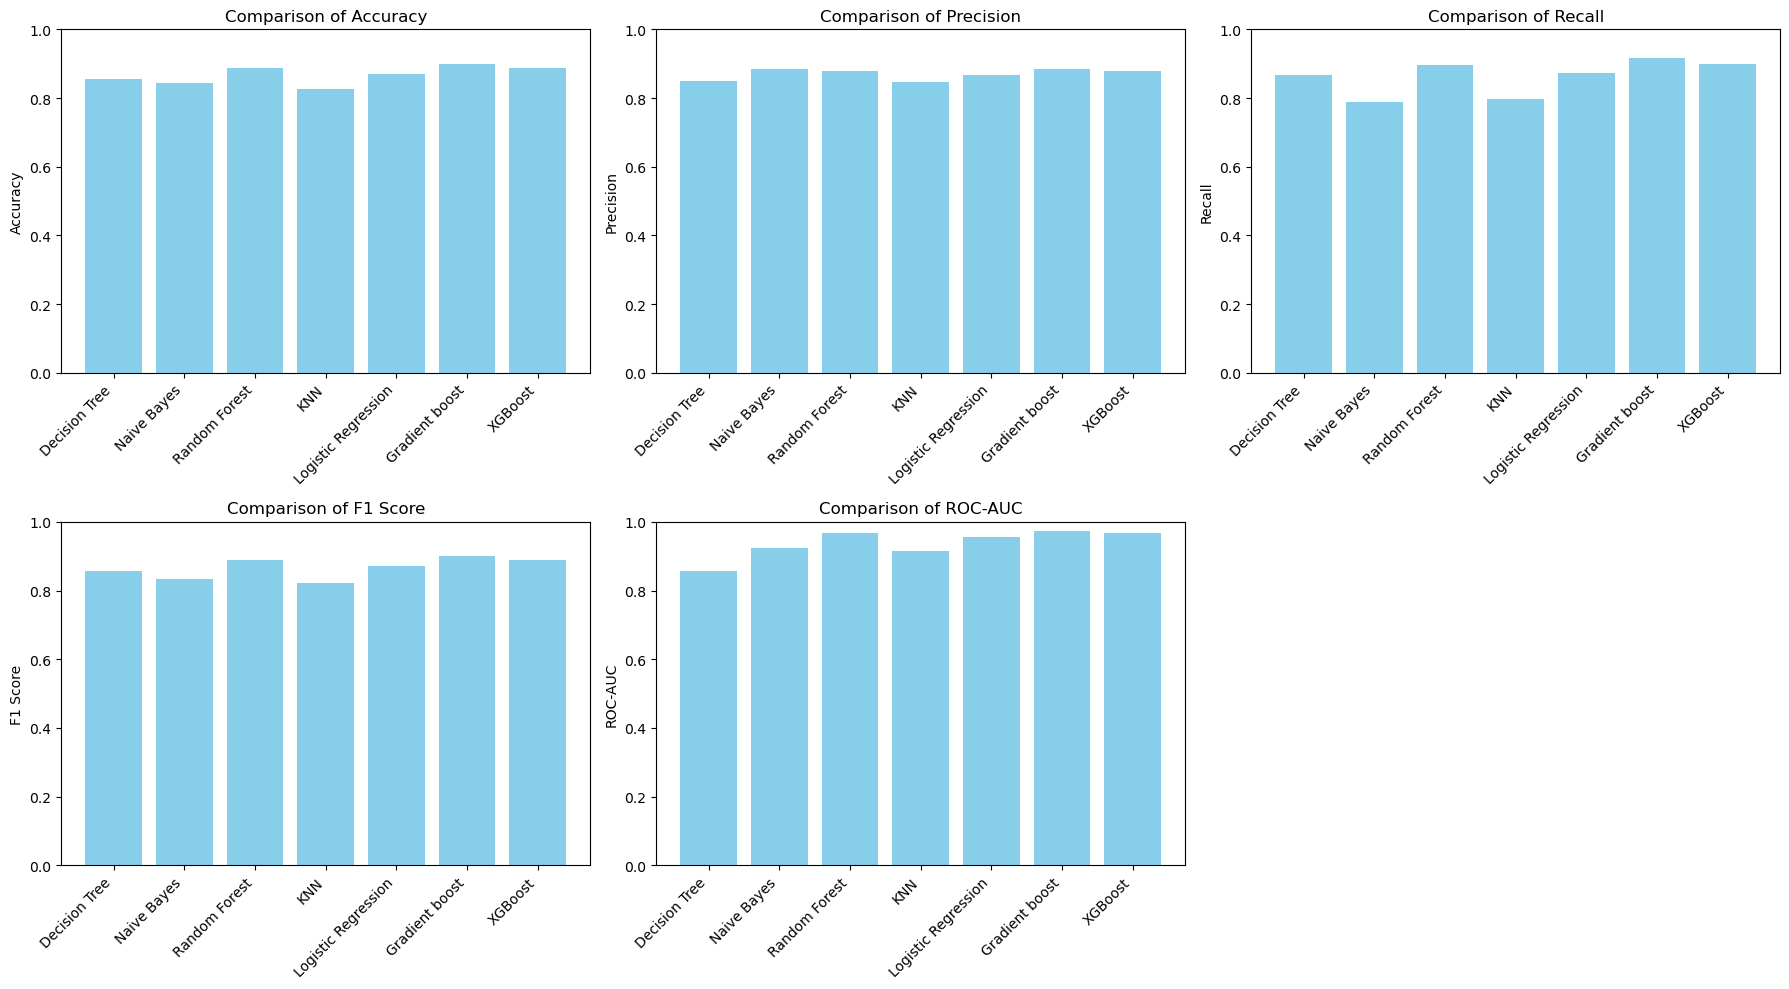

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Predict class labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    auc_pr = average_precision_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store the results in a dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'AUC-PR': auc_pr
    }

# Collect the metrics for visualization
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
model_names = list(results.keys())

# Prepare data for each metric
metrics_data = {metric: [results[model][metric] for model in model_names] for metric in metric_names}

# Plot a bar chart for each metric
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()

# Loop through the metrics and plot them
for i, metric in enumerate(metric_names):
    axs[i].bar(model_names, metrics_data[metric], color='skyblue')
    axs[i].set_title(f'Comparison of {metric}')
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0, 1)  # Set y-axis limits for better comparison
    axs[i].set_xticklabels(model_names, rotation=45, ha='right')

# Remove the empty chart if there are less than 6 metrics
if len(metric_names) < 6:
    fig.delaxes(axs[5])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

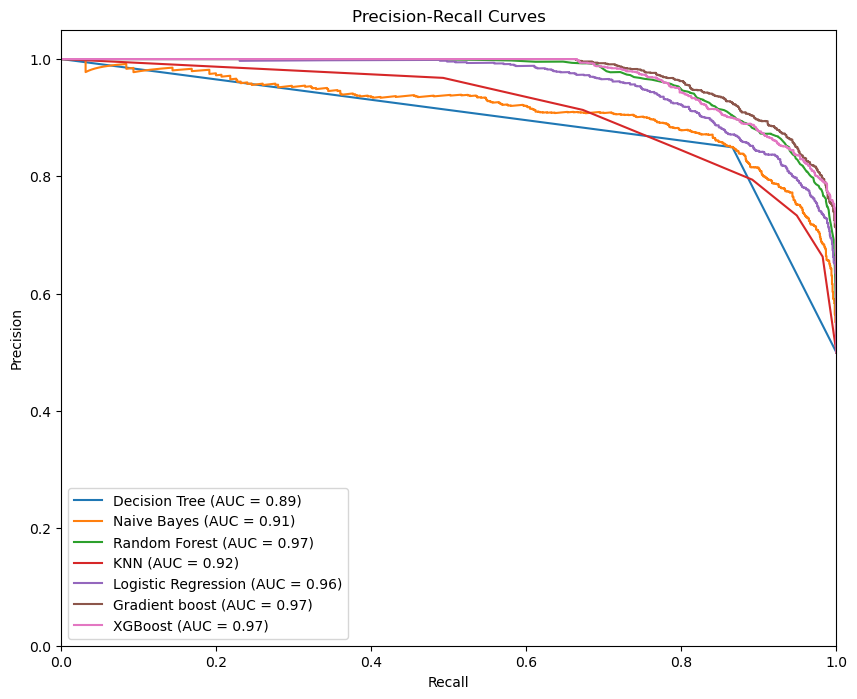

In [84]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each model
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

# Set plot boundaries and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()


* AUC-PR is a measure of the overall performance of a classification model. It is the area under the precision-recall curve, which represents the average precision at different recall levels. A higher AUC-PR indicates better performance.The AUC-PR is a more suitable metric than the AUC-ROC when dealing with imbalanced datasets, where the number of positive and negative examples is significantly different. This is because AUC-ROC can be misleading in such cases, as it may give a high score even if the model performs poorly on the minority class.

* The Gradient boost model is the best performing model for the diabetes classification